# LRU 알고리즘

In [33]:
def LRU(inputlist,stacklimit):
    import time
    
    start = time.time()
    stacklist=[]
    count=0
    for i in range(len(inputlist)):
        if(i==0):
            stacklist.append(inputlist[0])
    
        
        elif(len(stacklist)<stacklimit):
            
            if(inputlist[i] in stacklist):
                count+=1#적중
            else:
                stacklist.append(inputlist[i])
                
        else:#stack limit차있으면

            if(inputlist[i] in stacklist):#적중
                stacklist.remove(inputlist[i])
                stacklist.insert(stacklimit-1,inputlist[i])
                count+=1
             
            else:
                stacklist.pop(0)
                stacklist.insert(stacklimit-1,inputlist[i])
        
        print(i,inputlist[i], stacklist)

    return (count/len(inputlist))*100,time.time()-start
            
        
        


# FIFO알고리즘

In [34]:
def FIFO(inputlist,stacklimit):
    
    import time
    start = time.time()
    stacklist=[]
    count=0
    
    for i in range(len(inputlist)):
        
        if(i==0):        
            stacklist.append(inputlist[0])
            
        elif(len(stacklist)<stacklimit):
            
            if(inputlist[i] in stacklist):
                count+=1
            else:
                stacklist.append(inputlist[i])

        else:#stack limit차있으면
            if(inputlist[i] in stacklist):#적중
                   
                count+=1
            else:
                stacklist.pop(0)
            
                stacklist.append(inputlist[i])
                
        print(i,inputlist[i], stacklist)
       
    return (count/len(inputlist))*100,time.time()-start
            
        
        

# LFU알고리즘

In [35]:
def LFU(inputlist,stacklimit):
    
    import time
    start = time.time()
    
    stacklist=[]
    countlist=[]
    count=0
    for i in range(len(inputlist)):
        if(i==0):        
            stacklist.append(inputlist[0])
            countlist.append(1)
        elif(len(stacklist)<stacklimit):
         
            if(inputlist[i] in stacklist):
                #적중한다면 그 stacklist넣어주기
                tempnumberindex=stacklist.index(inputlist[i])
                countlist[tempnumberindex]+=1
                count+=1
            else:
                #적중하지않는다면 
                stacklist.append(inputlist[i])
                countlist.append(1)

        else:#stack limit차있으면

            if(inputlist[i] in stacklist):#적중
                tempnumberindex=stacklist.index(inputlist[i])
                countlist[tempnumberindex]+=1
                count+=1
            else:
                lowindex=countlist.index(min(countlist))
                stacklist.pop(lowindex)
                stacklist.insert(lowindex,inputlist[i])
                countlist[lowindex]=1
        print(i,inputlist[i],"stack", stacklist,"count",countlist)
    return (count/len(inputlist))*100,time.time()-start

# random 알고리즘

In [37]:
def random(inputlist,stacklimit):
    import time
    import random
    start = time.time()
    stacklist=[]
    count=0
    flag=0
    temp2=-1
    for i in range(len(inputlist)):
        if(len(stacklist)<stacklimit):
            if(i==0):
                stacklist.append(inputlist[i])
            else:
                if(inputlist[i] in stacklist):
                    flag=1
                    count+=1
                else:
                    flag=0
                    stacklist.append(inputlist[i])

        else:#stack limit차있으면

            if(inputlist[i] in stacklist):#적중
                count+=1
                flag=1
            else:
                temp2=random.randrange(0,stacklimit)
            
                stacklist.pop(temp2)
                flag=0
                stacklist.append(inputlist[i])

        print(i,inputlist[i],stacklist)
            
    return (count/len(inputlist))*100,time.time()-start


# 대체알고리즘 LFRU

In [38]:
def pow_(n):
    return pow(0.5, 0.5 * n)


In [39]:
def lfru_find(vec,n):
    check = False
    if (n in vec):
        check = True; #//적중
    #print(check)
    return check

In [40]:
def lfru_change(vec,vec2,n,stacklimit):
    mina = 100.0
    change_num = -1
    find_lfru = []
    a=0
    #print(len(vec),len(vec2),"vec vec2")
    #print(vec,vec2,"vec","vec2list")
    for i in range(stacklimit): 
         find_lfru.append(0.0)
    for j in range(stacklimit):  
        for i in range(len(vec2)):
            if (vec2[i] == vec[j]):
                find_lfru.append(pow_(len(vec2) - i))
     

    for j in range(len(vec)):  
        if (find_lfru[j] != 0.0):
            if (find_lfru[j] < mina):
                change_num = j
                mina = find_lfru[j]
                
    if(change_num!=-1):
        a+=change_num
    vec.pop(a)

In [41]:
def LFRU(inputlist,stacklimit):
    import time
    start = time.time()
    vec=[]
    find_num=0
    vec2=[]
 
    for i in range(len(inputlist)): 
        if(len(vec)==0):
            vec.append(inputlist[i])
            print(vec)
            
        else:
      
            if (lfru_find(vec,inputlist[i])==False):
                if (len(vec) < stacklimit):
                    vec.append(inputlist[i])
                    print(vec)
                 

                else:
                    lfru_change(vec,vec2,inputlist[i],stacklimit)
                    vec.append(inputlist[i])
                    print(vec);            

            else:
                find_num+=1;

        vec2.append(inputlist[i]);
    return (find_num/len(inputlist))*100,time.time()-start
    



# slot의 크기와 숫자 패턴입력 부분

In [43]:
print("한칸씩 텀을두고 숫자를 입력해주세요 ex) 1 2 3 4 5 6")
inputlist=list(map(int,input().split()))
stacklimit=int(input("슬롯의 크기"))

한칸씩 텀을두고 숫자를 입력해주세요 ex) 1 2 3 4 5 6
3 2 4 5 3 3 2 3
슬롯의 크기3


# LRU 알고리즘 

In [44]:
LRU(inputlist,stacklimit)

0 3 [3]
1 2 [3, 2]
2 4 [3, 2, 4]
3 5 [2, 4, 5]
4 3 [4, 5, 3]
5 3 [4, 5, 3]
6 2 [5, 3, 2]
7 3 [5, 2, 3]


(25.0, 0.0009531974792480469)

# FIFO 알고리즘

In [45]:
FIFO(inputlist,stacklimit)

0 3 [3]
1 2 [3, 2]
2 4 [3, 2, 4]
3 5 [2, 4, 5]
4 3 [4, 5, 3]
5 3 [4, 5, 3]
6 2 [5, 3, 2]
7 3 [5, 3, 2]


(25.0, 0.0006086826324462891)

# LFU 알고리즘

In [46]:
LFU(inputlist,stacklimit)

0 3 stack [3] count [1]
1 2 stack [3, 2] count [1, 1]
2 4 stack [3, 2, 4] count [1, 1, 1]
3 5 stack [5, 2, 4] count [1, 1, 1]
4 3 stack [3, 2, 4] count [1, 1, 1]
5 3 stack [3, 2, 4] count [2, 1, 1]
6 2 stack [3, 2, 4] count [2, 2, 1]
7 3 stack [3, 2, 4] count [3, 2, 1]


(37.5, 0.0010099411010742188)

# random 알고리즘

In [47]:
random(inputlist,stacklimit)

0 3 [3]
1 2 [3, 2]
2 4 [3, 2, 4]
3 5 [3, 2, 5]
4 3 [3, 2, 5]
5 3 [3, 2, 5]
6 2 [3, 2, 5]
7 3 [3, 2, 5]


(50.0, 0.0008130073547363281)

# LFRU 알고리즘

In [48]:
LFRU(inputlist,stacklimit)

[3]
[3, 2]
[3, 2, 4]
[2, 4, 5]
[4, 5, 3]
[5, 3, 2]


(25.0, 0.0004830360412597656)

# timetable insert함수

In [16]:
import pandas as pd
timetable = [[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
hitratio=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
 

In [17]:
timetable

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [49]:
def timetableinsert(inputlist,stacklimit):
    LRU_hitratio,LRU_timecheck=LRU(inputlist,stacklimit)
    FIFO_hitratio,FIFO_timecheck=FIFO(inputlist,stacklimit)
    LFU_hitratio,LFU_timecheck=LFU(inputlist,stacklimit)
    RAN_hitratio,RAN_timecheck=random(inputlist,stacklimit)
    LFRU_hitratio,LFRU_timecheck=LFRU(inputlist,stacklimit)
    print()
    #print(LRU_timecheck,FIFO_timecheck,LFU_timecheck,RAN_timecheck)
    if(stacklimit==2):
        hitratio[0][0]=LRU_hitratio
        hitratio[0][1]=FIFO_hitratio
        hitratio[0][2]=LFU_hitratio
        hitratio[0][3]=RAN_hitratio
        hitratio[0][4]=LFRU_hitratio
        timetable[0][0]=LRU_timecheck
        timetable[0][1]=FIFO_timecheck
        timetable[0][2]=LFU_timecheck
        timetable[0][3]=RAN_timecheck
        timetable[0][4]=LFRU_timecheck
    
    elif(stacklimit==3):
        hitratio[1][0]=LRU_hitratio
        hitratio[1][1]=FIFO_hitratio
        hitratio[1][2]=LFU_hitratio
        hitratio[1][3]=RAN_hitratio
        hitratio[1][4]=LFRU_hitratio
        timetable[1][0]=LRU_timecheck

        timetable[1][1]=FIFO_timecheck

        timetable[1][2]=LFU_timecheck

        timetable[1][3]=RAN_timecheck
        
        timetable[1][4]=LFRU_timecheck
    elif(stacklimit==4):
        hitratio[2][0]=LRU_hitratio
        hitratio[2][1]=FIFO_hitratio
        hitratio[2][2]=LFU_hitratio
        hitratio[2][3]=RAN_hitratio
        hitratio[2][4]=LFRU_hitratio
        timetable[2][0]=LRU_timecheck

        timetable[2][1]=FIFO_timecheck

        timetable[2][2]=LFU_timecheck

        timetable[2][3]=RAN_timecheck

        timetable[2][4]=LFRU_timecheck
    
    elif(stacklimit==5):
        hitratio[3][0]=LRU_hitratio
        hitratio[3][1]=FIFO_hitratio
        hitratio[3][2]=LFU_hitratio
        hitratio[3][3]=RAN_hitratio
        hitratio[3][4]=LFRU_hitratio
        timetable[3][0]=LRU_timecheck

        timetable[3][1]=FIFO_timecheck

        timetable[3][2]=LFU_timecheck

        timetable[3][3]=RAN_timecheck
        timetable[3][4]=LFRU_timecheck

    
    elif (stacklimit==6):
        hitratio[4][0]=LRU_hitratio
        hitratio[4][1]=FIFO_hitratio
        hitratio[4][2]=LFU_hitratio
        hitratio[4][3]=RAN_hitratio
        hitratio[4][4]=LFRU_hitratio
        timetable[4][0]=LRU_timecheck
        timetable[4][1]=FIFO_timecheck

        timetable[4][2]=LFU_timecheck

        timetable[4][3]=RAN_timecheck
        timetable[4][4]=LFRU_timecheck


# timetable insert

In [50]:
print("한칸씩 텀을두고 숫자를 입력해주세요 ex) 1 2 3 4 5 6")
inputlist=list(map(int,input().split()))
timetableinsert(inputlist,2)
timetableinsert(inputlist,3)
timetableinsert(inputlist,4)
timetableinsert(inputlist,5)
timetableinsert(inputlist,6)



한칸씩 텀을두고 숫자를 입력해주세요 ex) 1 2 3 4 5 6
3 3 2 3 4 3 2
0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [2, 3]
4 4 [3, 4]
5 3 [4, 3]
6 2 [3, 2]
0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [3, 2]
4 4 [2, 4]
5 3 [4, 3]
6 2 [3, 2]
0 3 stack [3] count [1]
1 3 stack [3] count [2]
2 2 stack [3, 2] count [2, 1]
3 3 stack [3, 2] count [3, 1]
4 4 stack [3, 4] count [3, 1]
5 3 stack [3, 4] count [4, 1]
6 2 stack [3, 2] count [4, 1]
0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [3, 2]
4 4 [2, 4]
5 3 [2, 3]
6 2 [2, 3]
[3]
[3, 2]
[2, 4]
[4, 3]
[3, 2]

0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [3, 2]
4 4 [3, 2, 4]
5 3 [2, 4, 3]
6 2 [4, 3, 2]
0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [3, 2]
4 4 [3, 2, 4]
5 3 [3, 2, 4]
6 2 [3, 2, 4]
0 3 stack [3] count [1]
1 3 stack [3] count [2]
2 2 stack [3, 2] count [2, 1]
3 3 stack [3, 2] count [3, 1]
4 4 stack [3, 2, 4] count [3, 1, 1]
5 3 stack [3, 2, 4] count [4, 1, 1]
6 2 stack [3, 2, 4] count [4, 2, 1]
0 3 [3]
1 3 [3]
2 2 [3, 2]
3 3 [3, 2]
4 4 [3, 2, 4]
5 3 [3, 2, 4]
6 2 [3, 2, 4]
[3]
[3, 2]
[3, 2, 4]

0 3 [3]
1 3 [3]
2 2 [3, 2]
3

In [51]:
timetable_Result = pd.DataFrame(timetable, ['slot 2','slot 3','slot 4','slot 5','slot 6'],['LRU','FIFO','LFU','Random',"LFRU"])
hitratio_Result = pd.DataFrame(hitratio, ['slot 2','slot 3','slot 4','slot 5','slot 6'],['LRU','FIFO','LFU','Random',"LFRU"])

In [52]:
timetable_Result

,LRU,FIFO,LFU,Random,LFRU
slot 2,0.000374,0.000260,0.001266,0.000244,0.000096
slot 3,0.000469,0.000272,0.000736,0.000380,0.000048
slot 4,0.000279,0.000459,0.000540,0.000275,0.000197
slot 5,0.000279,0.000274,0.000736,0.000288,0.000046
slot 6,0.000278,0.000506,0.000651,0.000471,0.000059


In [53]:
hitratio_Result

,LRU,FIFO,LFU,Random,LFRU
slot 2,42.857143,28.571429,42.857143,42.857143,28.571429
slot 3,57.142857,57.142857,57.142857,57.142857,57.142857
slot 4,57.142857,57.142857,57.142857,57.142857,57.142857
slot 5,57.142857,57.142857,57.142857,57.142857,57.142857
slot 6,57.142857,57.142857,57.142857,57.142857,57.142857


# SLOT 별 TIME

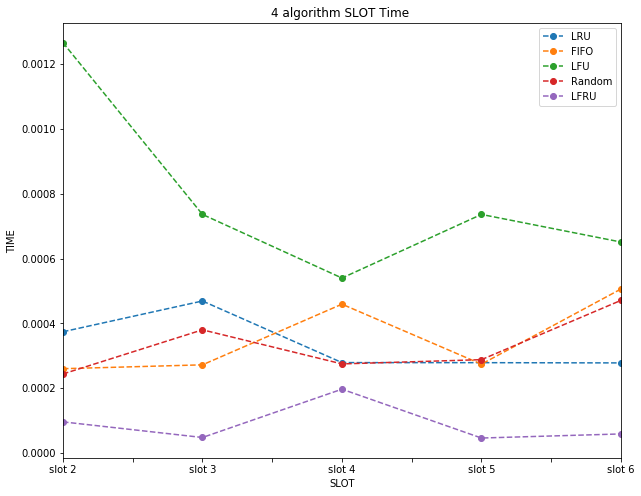

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
timetable_Result.plot(marker='o',linestyle="--",figsize=(10,8))
plt.title("4 algorithm SLOT Time ")
plt.xlabel("SLOT")
plt.ylabel("TIME")
plt.show()

# 알고리즘 별 hit ratio

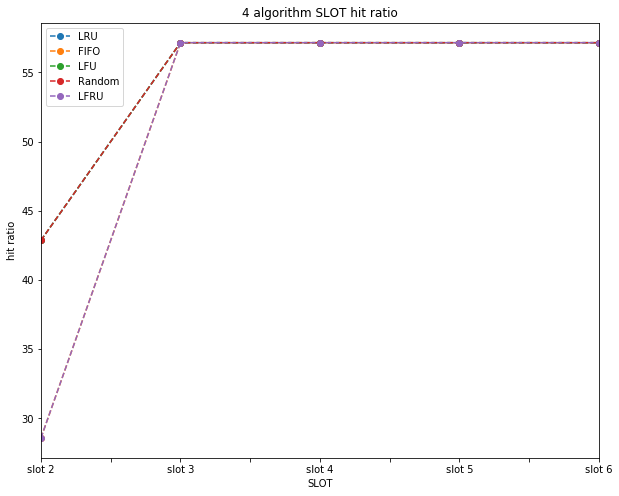

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
hitratio_Result.plot(marker='o',linestyle="--",figsize=(10,8))
plt.title("4 algorithm SLOT hit ratio")
plt.xlabel("SLOT")
plt.ylabel("hit ratio")
plt.show()

# 각 알고리즘의 평균 hitratio

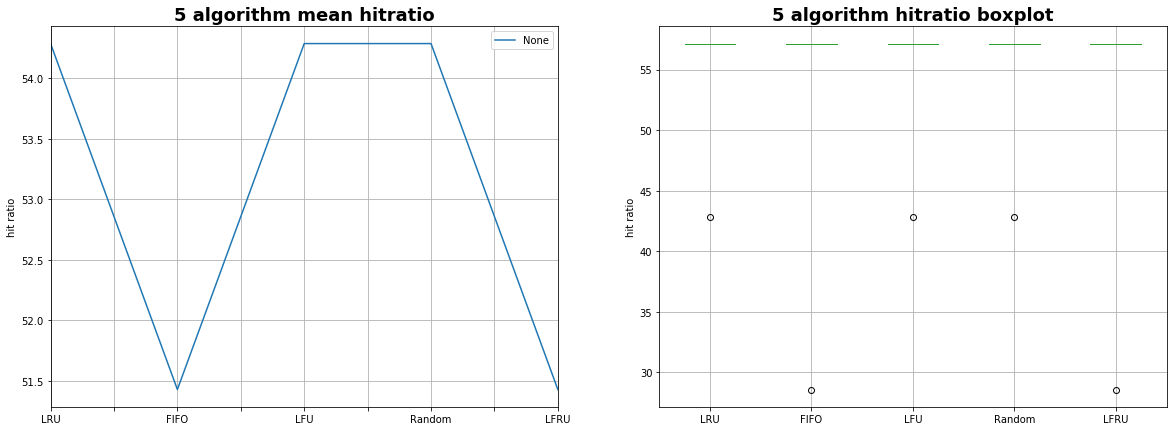

In [56]:
%matplotlib inline
plt.subplots(figsize=(20, 7)) 
plt.subplot(1,2,1)

hitratio_Result.mean().plot() 
plt.legend()
plt.title('5 algorithm mean hitratio', fontsize=18, fontweight='bold') 
plt.ylabel("hit ratio")
plt.grid(True)


plt.subplot(1,2,2)

plt.title("5 algorithm hitratio boxplot", fontsize=18, fontweight='bold')
plt.ylabel("hit ratio")
hitratio_Result.boxplot()
plt.show()




# 각 algorithm별  평균time

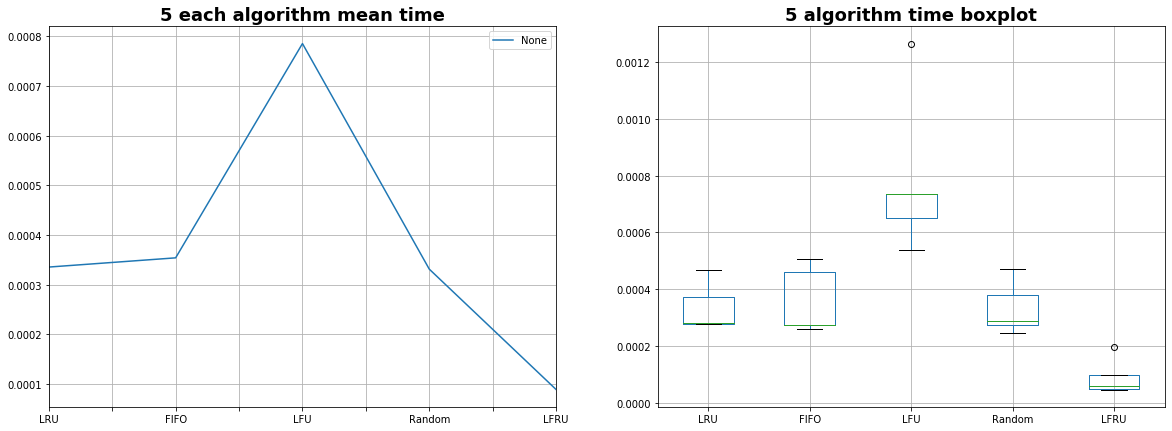

In [57]:
%matplotlib inline
plt.subplots(figsize=(20, 7)) 
plt.subplot(1,2,1)

timetable_Result.mean().plot()
plt.legend()
plt.title("5 each algorithm mean time", fontsize=18, fontweight='bold')        
plt.grid(True)


plt.subplot(1,2,2)

plt.title("5 algorithm time boxplot", fontsize=18, fontweight='bold')

timetable_Result.boxplot()
plt.show()


